In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

<h3><u>1) SPY Historical Analysis from 2000-01-01 to 2025-04-09</u>

In [2]:
backtest_start_date = "2000-01-01"
backtest_end_date = "2025-04-10" #-1 when used in yf

trade_start_date = "2025-04-09"
trade_end_date = "2025-05-02"
ticker = "SPY"

In [10]:
def yf_download_and_save_ticker(
    ticker: str,
    start_date: str,
    end_date: str,
    save_path: str = None,
    auto_adjust: bool = False
) -> pd.DataFrame:
    """
    Download historical OHLCV data for a given ticker from Yahoo Finance 
    and save it to a CSV file.

    Parameters
    ----------
    ticker : str
        Ticker symbol (e.g., "SPY").
    start_date : str
        Start date in "YYYY-MM-DD" format.
    end_date : str
        End date in "YYYY-MM-DD" format.
    save_path : str
        Relative or absolute path for saving the CSV file.
    auto_adjust : bool, optional
        Whether to auto-adjust prices (splits/dividends). 
        Default is False for raw prices.

    Returns
    -------
    pd.DataFrame
        The downloaded price DataFrame.
    """
    df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=auto_adjust)
    if save_path:
        df.to_csv(save_path, index_label="Date")
    return df


# ---- Call the function ----
save_path = f"../data/SPY/{ticker}_historical_data_from_{backtest_start_date}_to_{trade_start_date}.csv"

df_spy = yf_download_and_save_ticker(
    ticker = ticker,
    start_date = backtest_start_date,
    end_date = backtest_end_date,
    save_path = save_path,
    auto_adjust=False
)


df_spy

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2000-01-03,91.887764,145.437500,148.250000,143.875000,148.250000,8164300
2000-01-04,88.294373,139.750000,144.062500,139.640625,143.531250,8089800
2000-01-05,88.452354,140.000000,141.531250,137.250000,139.937500,12177900
2000-01-06,87.030785,137.750000,141.500000,137.750000,139.625000,6227200
2000-01-07,92.085197,145.750000,145.750000,140.062500,140.312500,8066500
...,...,...,...,...,...,...
2025-04-03,533.638550,536.700012,547.969971,536.700012,545.109985,125986000
2025-04-04,502.397797,505.279999,525.869995,505.059998,523.669983,217965100


In [9]:
df_spy

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2000-01-05,88.452354,140.000000,141.531250,137.250000,139.937500,12177900
2000-01-06,87.030785,137.750000,141.500000,137.750000,139.625000,6227200
2000-01-07,92.085197,145.750000,145.750000,140.062500,140.312500,8066500
2000-01-10,92.401131,146.250000,146.906250,145.031250,146.250000,5741700
2000-01-11,91.295425,144.500000,146.093750,143.500000,145.812500,7503700
...,...,...,...,...,...,...
2025-04-03,533.638550,536.700012,547.969971,536.700012,545.109985,125986000
2025-04-04,502.397797,505.279999,525.869995,505.059998,523.669983,217965100


In [6]:
row_df = df_spy.loc[[trade_start_date]]
spy_close = row_df[("Close", "SPY")].iloc[0]
print(row_df)

Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                                                                     
2025-04-09  545.490601  548.619995  548.619995  493.049988  493.440002   

Price          Volume  
Ticker            SPY  
Date                   
2025-04-09  241867300  


In [ ]:
# Filter data from 2000-01-01 to 2025-04-09
df_spy_filtered = df_spy[(df_spy.index >= '2000-01-01') & (df_spy.index <= '2025-04-09')].copy()

print(f"Filtered data shape: {df_spy_filtered.shape}")
print(f"Date range: {df_spy_filtered.index[0]} to {df_spy_filtered.index[-1]}")

# Calculate cumulative returns
df_spy_filtered['Daily_Return'] = df_spy_filtered['Adj Close'].pct_change()
df_spy_filtered['Cumulative_Return'] = (1 + df_spy_filtered['Daily_Return']).cumprod() - 1

df_spy_filtered

Filtered data shape: (6356, 6)
Date range: 2000-01-03 00:00:00 to 2025-04-09 00:00:00


Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Cumulative_Return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,,
Date,,,,,,,,
2000-01-03,91.887787,145.437500,148.250000,143.875000,148.250000,8164300,NaN,NaN
2000-01-04,88.294395,139.750000,144.062500,139.640625,143.531250,8089800,-0.039106,-0.039106
2000-01-05,88.452324,140.000000,141.531250,137.250000,139.937500,12177900,0.001789,-0.037388
2000-01-06,87.030800,137.750000,141.500000,137.750000,139.625000,6227200,-0.016071,-0.052858
2000-01-07,92.085243,145.750000,145.750000,140.062500,140.312500,8066500,0.058076,0.002149
...,...,...,...,...,...,...,...,...
2025-04-03,533.638611,536.700012,547.969971,536.700012,545.109985,125986000,-0.049281,4.807503
2025-04-04,502.397797,505.279999,525.869995,505.059998,523.669983,217965100,-0.058543,4.467514


In [ ]:
df_spy_filtered[df_spy_filtered['Daily_Return'] >=0.07]

Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Cumulative_Return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,,
Date,,,,,,,,
2008-10-13,73.938622,101.349998,101.349998,89.949997,93.870003,455584000,0.145197,-0.195338
2008-10-28,68.401443,93.760002,94.239998,84.529999,87.339996,639939500,0.116855,-0.255598
2009-03-23,60.902321,82.220001,82.290001,78.309998,78.739998,419933300,0.071829,-0.337210
2020-03-13,247.524246,269.320007,271.480011,248.520004,263.089996,329566100,0.085486,1.693767
2020-03-24,224.786194,243.149994,244.100006,233.800003,234.419998,235494500,0.090603,1.446312
2025-04-09,545.490601,548.619995,548.619995,493.049988,493.440002,241867300,0.105019,4.936486


In [ ]:
def analyze_and_plot_return_distribution(df, col_name, title_prefix=None) -> dict:
    """
    Analyze and plot the distribution of a return series.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the return column.
    col_name : str
        Name of the column in df with return data.
    title_prefix : str, optional
        Text to prepend to the plot titles (e.g. 'SPY', 'AAPL').

    Returns
    -------
    dict
        Dictionary with basic statistics for the return series.
    """
    # Clean series
    returns = df[col_name].dropna()

    # Last return & date (assumes df index is datetime-like or at least ordered)
    last_return = returns.iloc[-1]
    last_date = returns.index[-1]

    # Stats
    mean_return = returns.mean()
    std_return = returns.std()
    median_return = returns.median()
    skewness = returns.skew()
    kurtosis = returns.kurtosis()

    # =========================================================================
    # PLOT 1: Histogram with Normal Distribution Overlay
    # =========================================================================
    fig1, ax1 = plt.subplots(figsize=(12, 7))

    ax1.hist(returns * 100,
             bins=100,
             density=True,
             alpha=0.7,
             edgecolor='black',
             linewidth=0.5,
             label='Actual Returns')

    # Fit normal distribution
    x = np.linspace(returns.min() * 100, returns.max() * 100, 100)
    normal_dist = stats.norm.pdf(x, mean_return * 100, std_return * 100)
    ax1.plot(x, normal_dist, 'r-', linewidth=2, label='Normal Distribution Fit')

    # Highlight the last return
    ax1.axvline(last_return * 100,
                color='green',
                linestyle='--',
                linewidth=2.5,
                label=f'{last_date:%Y-%m-%d} Return: {last_return*100:.2f}%',
                zorder=10)

    # Add mean line
    ax1.axvline(mean_return * 100,
                color='orange',
                linestyle='--',
                linewidth=2,
                label=f'Mean: {mean_return*100:.3f}%',
                alpha=0.7)

    # Titles
    prefix = f"{title_prefix} " if title_prefix else ""
    ax1.set_xlabel('Daily Return (%)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Density', fontsize=12, fontweight='bold')
    ax1.set_title(
        f'Distribution of {prefix}Daily Returns\nActual vs Normal Distribution',
        fontsize=14,
        fontweight='bold'
    )
    ax1.legend(loc='upper right', fontsize=10)
    ax1.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # =========================================================================
    # PLOT 2: Q-Q Plot
    # =========================================================================
    fig2, ax2 = plt.subplots(figsize=(10, 10))
    stats.probplot(returns, dist="norm", plot=ax2)
    ax2.set_title(
        f'Q-Q Plot: {prefix}Actual Returns vs Normal Distribution',
        fontsize=14,
        fontweight='bold'
    )
    ax2.set_xlabel('Theoretical Quantiles', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Sample Quantiles', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    # Return stats in case you want to use them later
    return {
        "mean": mean_return,
        "std": std_return,
        "median": median_return,
        "skewness": skewness,
        "kurtosis": kurtosis,
        "last_return": last_return,
        "last_date": last_date,
    }

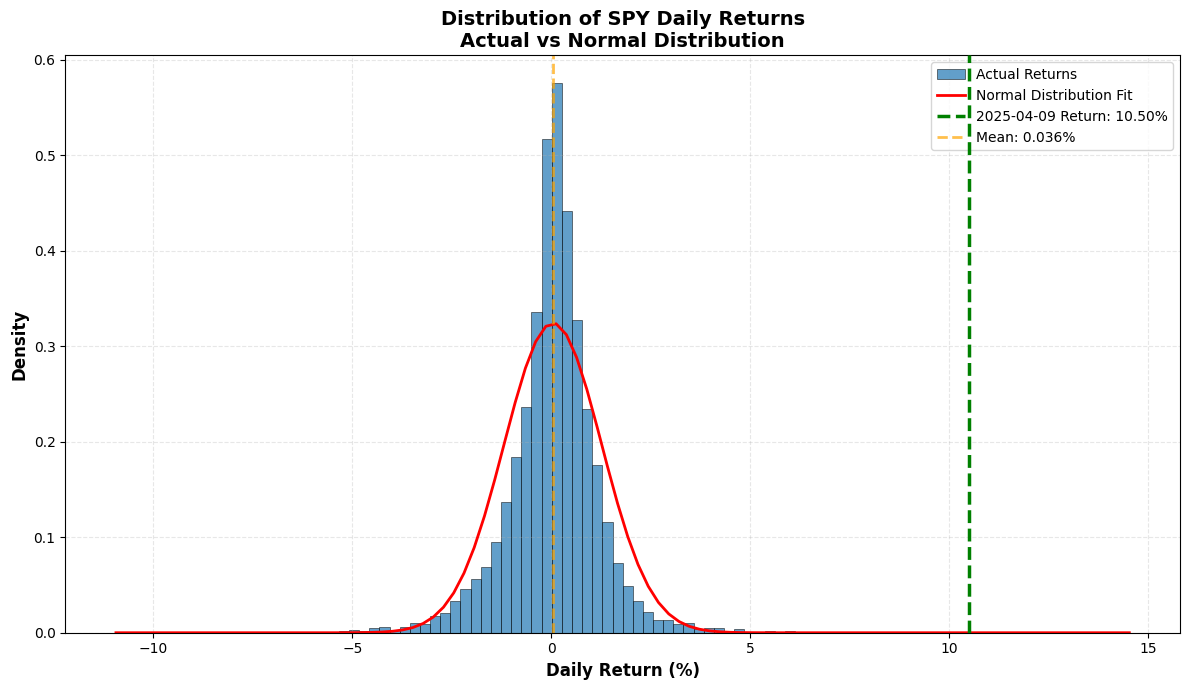

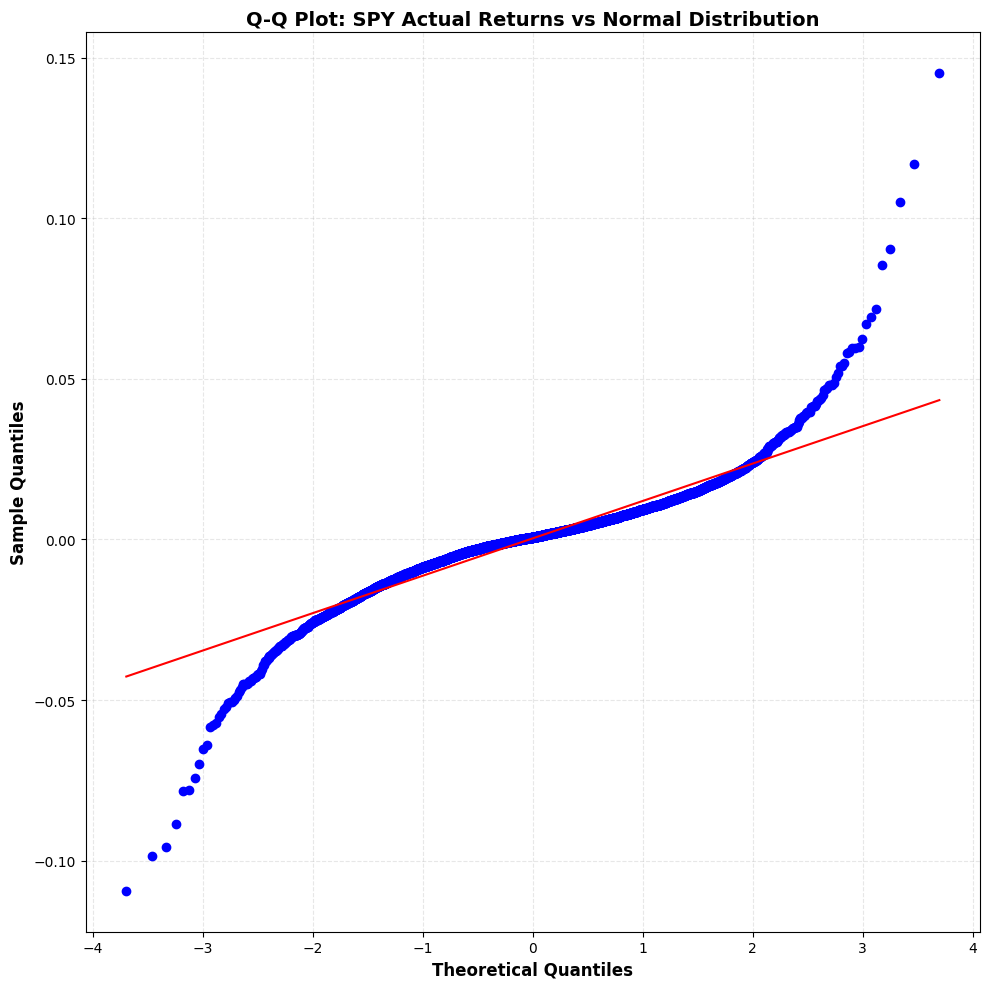

{'mean': np.float64(0.0003559836588106188),
 'std': np.float64(0.012301555429264185),
 'median': np.float64(0.0006693174675962421),
 'skewness': np.float64(0.05261194548573993),
 'kurtosis': np.float64(12.000971714768994),
 'last_return': np.float64(0.10501934425982218),
 'last_date': Timestamp('2025-04-09 00:00:00')}

In [ ]:
analyze_and_plot_return_distribution(df_spy_filtered, "Daily_Return", title_prefix="SPY")

In [ ]:
def print_returns_summary_statistics(returns, return_value, return_date):
    """
    Print comprehensive summary statistics for return distribution.
    
    Parameters:
    -----------
    returns : pd.Series
        Series of daily returns (as decimals, not percentages)
    return_value : float
        The specific return value to highlight
    return_date : datetime
        Date of the specific return
    
    Returns:
    --------
    dict : Dictionary containing all calculated statistics
    """
        
    # Remove NaN values before calculating statistics
    returns = returns.dropna()

    # Calculate statistics
    mean_return = returns.mean()
    std_return = returns.std()
    median_return = returns.median()
    skewness = returns.skew()
    kurtosis = returns.kurtosis()
    
    print("\n" + "="*80)
    print("SPY DAILY RETURNS DISTRIBUTION ANALYSIS (2000-01-01 to 2025-04-09)")
    print("="*80)
    
    print(f"\nBASIC STATISTICS:")
    print(f"   Mean Return:              {mean_return*100:.4f}%  ({mean_return*252*100:.2f}% annualized)")
    print(f"   Median Return:            {median_return*100:.4f}%")
    print(f"   Standard Deviation:       {std_return*100:.4f}%  ({std_return*np.sqrt(252)*100:.2f}% annualized)")
    print(f"   Variance:                 {(std_return**2)*10000:.6f}% squared")
    
    print(f"\nDISTRIBUTION SHAPE:")
    print(f"   Skewness:                 {skewness:.4f}  {'(left-tailed)' if skewness < 0 else '(right-tailed)'}")
    print(f"   Excess Kurtosis:          {kurtosis:.4f}  {'(fat tails)' if kurtosis > 0 else '(thin tails)'}")

    
    print(f"\nPERCENTILES:")
    print(f"   1st Percentile:           {np.percentile(returns*100, 1):.2f}%")
    print(f"   5th Percentile:           {np.percentile(returns*100, 5):.2f}%")
    print(f"   25th Percentile (Q1):     {np.percentile(returns*100, 25):.2f}%")
    print(f"   50th Percentile (Median): {np.percentile(returns*100, 50):.2f}%")
    print(f"   75th Percentile (Q3):     {np.percentile(returns*100, 75):.2f}%")
    print(f"   95th Percentile:          {np.percentile(returns*100, 95):.2f}%")
    print(f"   99th Percentile:          {np.percentile(returns*100, 99):.2f}%")
    
    print(f"\nEXTREME VALUES:")
    print(f"   Minimum Return:           {returns.min()*100:.2f}%  ({returns.idxmin().strftime('%Y-%m-%d')})")
    print(f"   Maximum Return:           {returns.max()*100:.2f}%  ({returns.idxmax().strftime('%Y-%m-%d')})")
    print(f"   Range:                    {(returns.max() - returns.min())*100:.2f}%")
    
    print(f"\nNORMALITY TEST (Jarque-Bera):")
    jb_stat, jb_pvalue = stats.jarque_bera(returns)
    print(f"   Test Statistic:           {jb_stat:.2f}")
    print(f"   P-value:                  {jb_pvalue:.6f}")
    is_normal = "Normally distributed (p >= 0.05)" if jb_pvalue >= 0.05 else "NOT normally distributed (p < 0.05)"
    print(f"   Result:                   {is_normal}")
    
    print(f"\nSPECIFIC RETURN ({return_date.strftime('%Y-%m-%d')}):")
    print(f"   Return:                   {return_value*100:.2f}%")
    percentile_rank = stats.percentileofscore(returns*100, return_value*100)
    print(f"   Percentile Rank:          {percentile_rank:.1f}th percentile")
    z_score = (return_value - mean_return) / std_return
    print(f"   Z-Score:                  {z_score:.2f} standard deviations from mean")
    print(f"   Interpretation:           ", end='')
    if abs(z_score) < 1:
        print("Within 1 std dev (normal day)")
    elif abs(z_score) < 2:
        print("Within 2 std dev (somewhat unusual)")
    elif abs(z_score) < 3:
        print("Within 3 std dev (unusual)")
    else:
        print("Beyond 3 std dev (very rare event!)")
    
    print(f"\nSAMPLE SIZE:")
    print(f"   Total Trading Days:       {len(returns):,}")
    print(f"   Positive Days:            {(returns > 0).sum():,} ({(returns > 0).sum()/len(returns)*100:.1f}%)")
    print(f"   Negative Days:            {(returns < 0).sum():,} ({(returns < 0).sum()/len(returns)*100:.1f}%)")
    print(f"   Neutral Days (0%):        {(returns == 0).sum():,}")
    
    print("\n" + "="*80)
    
    return {
        'Total Trading Days': len(returns),
        'mean': mean_return,
        'std': std_return,
        'median': median_return,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'min': returns.min(),
        'max': returns.max(),
        'jb_stat': jb_stat,
        'jb_pvalue': jb_pvalue,
        'return_value': return_value,
        'z_score': z_score,
        'percentile_rank': percentile_rank,
        'percentile_1': np.percentile(returns, 1),
        'percentile_5': np.percentile(returns, 5),
        'percentile_25': np.percentile(returns, 25),
        'percentile_50': np.percentile(returns, 50),
        'percentile_75': np.percentile(returns, 75),
        'percentile_95': np.percentile(returns, 95),
        'percentile_99': np.percentile(returns, 99)
        
    }

In [ ]:
# ============================================================================
# PRINT SUMMARY STATISTICS
# ============================================================================

# Get the speicfic last return statistic (2025-04-09)
returns = df_spy_filtered['Daily_Return']
last_return = df_spy_filtered['Daily_Return'].iloc[-1]
last_date = df_spy_filtered.index[-1]

spy_daily_return_statistic = print_returns_summary_statistics(returns, last_return, last_date)
spy_daily_return_statistic


SPY DAILY RETURNS DISTRIBUTION ANALYSIS (2000-01-01 to 2025-04-09)

BASIC STATISTICS:
   Mean Return:              0.0356%  (8.97% annualized)
   Median Return:            0.0669%
   Standard Deviation:       1.2302%  (19.53% annualized)
   Variance:                 1.513283% squared

DISTRIBUTION SHAPE:
   Skewness:                 0.0526  (right-tailed)
   Excess Kurtosis:          12.0010  (fat tails)

PERCENTILES:
   1st Percentile:           -3.43%
   5th Percentile:           -1.92%
   25th Percentile (Q1):     -0.47%
   50th Percentile (Median): 0.07%
   75th Percentile (Q3):     0.60%
   95th Percentile:          1.73%
   99th Percentile:          3.35%

EXTREME VALUES:
   Minimum Return:           -10.94%  (2020-03-16)
   Maximum Return:           14.52%  (2008-10-13)
   Range:                    25.46%

NORMALITY TEST (Jarque-Bera):
   Test Statistic:           38073.14
   P-value:                  0.000000
   Result:                   NOT normally distributed (p < 0.05)

SP

{'Total Trading Days': 6355,
 'mean': np.float64(0.0003559836588106188),
 'std': np.float64(0.012301555429264185),
 'median': np.float64(0.0006693174675962421),
 'skewness': np.float64(0.05261194548573993),
 'kurtosis': np.float64(12.000971714768994),
 'min': np.float64(-0.10942365092691297),
 'max': np.float64(0.14519721903989868),
 'jb_stat': np.float64(38073.13841598062),
 'jb_pvalue': np.float64(0.0),
 'return_value': np.float64(0.10501934425982218),
 'z_score': np.float64(8.508140389468778),
 'percentile_rank': np.float64(99.96852871754524),
 'percentile_1': np.float64(-0.034287385486896985),
 'percentile_5': np.float64(-0.019203643842517836),
 'percentile_25': np.float64(-0.0046951388697610286),
 'percentile_50': np.float64(0.0006693174675962421),
 'percentile_75': np.float64(0.005996046084717599),
 'percentile_95': np.float64(0.017305440584463164),
 'percentile_99': np.float64(0.0335303675973916)}

In [ ]:
#Sort by Daily_Return in descending order and get top 10
top_10_gains = df_spy_filtered.nlargest(10, 'Daily_Return')[['Adj Close', 'Daily_Return']].copy()

# Add percentage return column for better readability
top_10_gains['Return_Pct'] = top_10_gains['Daily_Return'] * 100

# Add some context columns
top_10_gains['Day_of_Week'] = top_10_gains.index.day_name()
top_10_gains['Year'] = top_10_gains.index.year

print("\n" + "="*100)
print("TOP 10 TRADING DAYS BY DAILY RETURN GAIN (2000-2025)")
print("="*100)
print()

top_10_gains



TOP 10 TRADING DAYS BY DAILY RETURN GAIN (2000-2025)



Price,Adj Close,Daily_Return,Return_Pct,Day_of_Week,Year
Ticker,SPY,,,,
Date,,,,,
2008-10-13,73.938622,0.145197,14.519722,Monday,2008
2008-10-28,68.401443,0.116855,11.685516,Tuesday,2008
2025-04-09,545.490601,0.105019,10.501934,Wednesday,2025
2020-03-24,224.786194,0.090603,9.060298,Tuesday,2020
2020-03-13,247.524246,0.085486,8.548621,Friday,2020
2009-03-23,60.902321,0.071829,7.182907,Monday,2009
2008-11-24,62.032570,0.069291,6.929055,Monday,2008
2020-04-06,244.856613,0.067166,6.716615,Monday,2020


<u>SPY Historical Analysis: 2025-04-09</u>

**Key Finding:** April 9, 2025 recorded the **third highest single-day return** in SPY history since 2000, representing the biggest rally across 6,300+ trading days spanning 25 years.

**Context:**
- Analysis period: 2000-01-01 to 2025-04-09
- Return metric: Daily total returns (Adj Close to Adj Close, includes dividends)
- Surpasses all previous records including 2008 Financial Crisis and March 2020 COVID crash rallies

**Implications:**
- Indicates extreme market stress and volatility regime
- Largest single-day moves historically occur during bear markets, not bull markets
- Reinforces importance of fat-tail distributions in options pricing and risk modeling
- Critical scenario for backtesting bullish risk reversal strategies

<h3><u>Part 2) SPY (17-Trading Day moving return) Historical Analysis from 2000-01-01 to 2025-04-09</u>

**Context:**
- Analysis period: 2000-01-01 to 2025-04-09
- Return metric: Rolling 17-trading day total return, calculated using adjusted close prices (includes dividends)
- This allow us to perform the scenario analysis later on the PnL of a 1-month option, 1 week prior to expiry on 2025-05-09, using the rolling 17-day total return (corresponding to approx. 3 calendar weeks). This matches the number of trading days from 2025 April 09 to 2025 May 02.

In [ ]:
start = pd.to_datetime(trade_start_date)
end = pd.to_datetime(trade_end_date)

# Find the number of trading days (Mon-Fri)
trading_days = pd.bdate_range(start, end)
print(f"Number of trading days between {trade_start_date} and {trade_end_date} is {len(trading_days)-1}")
trading_days

Number of trading days between 2025-04-09 and 2025-05-02 is 17


DatetimeIndex(['2025-04-09', '2025-04-10', '2025-04-11', '2025-04-14',
               '2025-04-15', '2025-04-16', '2025-04-17', '2025-04-18',
               '2025-04-21', '2025-04-22', '2025-04-23', '2025-04-24',
               '2025-04-25', '2025-04-28', '2025-04-29', '2025-04-30',
               '2025-05-01', '2025-05-02'],
              dtype='datetime64[ns]', freq='B')

$$
\text{RollingReturn}_{t}^{(17)} = \frac{P_t}{P_{t-17}} - 1
$$

In [ ]:
df_spy_filtered['Rolling_17d_Return'] = df_spy_filtered["Adj Close"] / df_spy_filtered["Adj Close"].shift(17) - 1
df_spy_filtered

Price,Adj Close,Close,High,Low,Open,Volume,Daily_Return,Cumulative_Return,Rolling_17d_Return
Ticker,SPY,SPY,SPY,SPY,SPY,SPY,,,
Date,,,,,,,,,
2000-01-03,91.887787,145.437500,148.250000,143.875000,148.250000,8164300,NaN,NaN,NaN
2000-01-04,88.294395,139.750000,144.062500,139.640625,143.531250,8089800,-0.039106,-0.039106,NaN
2000-01-05,88.452324,140.000000,141.531250,137.250000,139.937500,12177900,0.001789,-0.037388,NaN
2000-01-06,87.030800,137.750000,141.500000,137.750000,139.625000,6227200,-0.016071,-0.052858,NaN
2000-01-07,92.085243,145.750000,145.750000,140.062500,140.312500,8066500,0.058076,0.002149,NaN
...,...,...,...,...,...,...,...,...,...
2025-04-03,533.638611,536.700012,547.969971,536.700012,545.109985,125986000,-0.049281,4.807503,-0.031669
2025-04-04,502.397797,505.279999,525.869995,505.059998,523.669983,217965100,-0.058543,4.467514,-0.093170


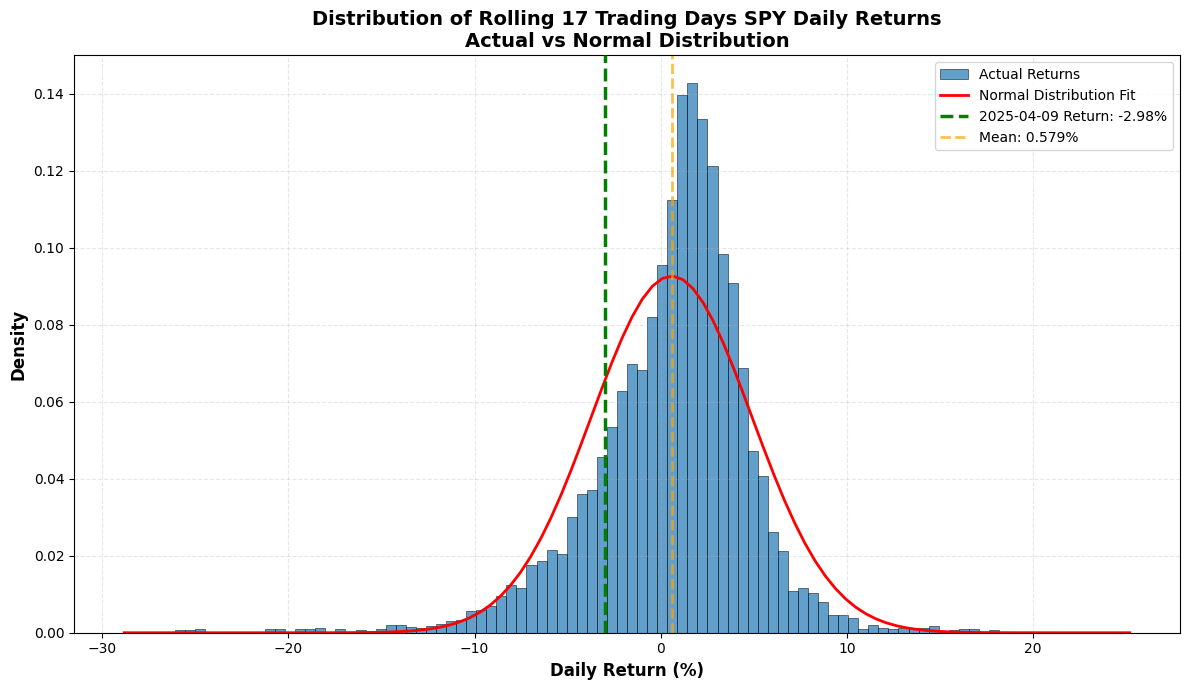

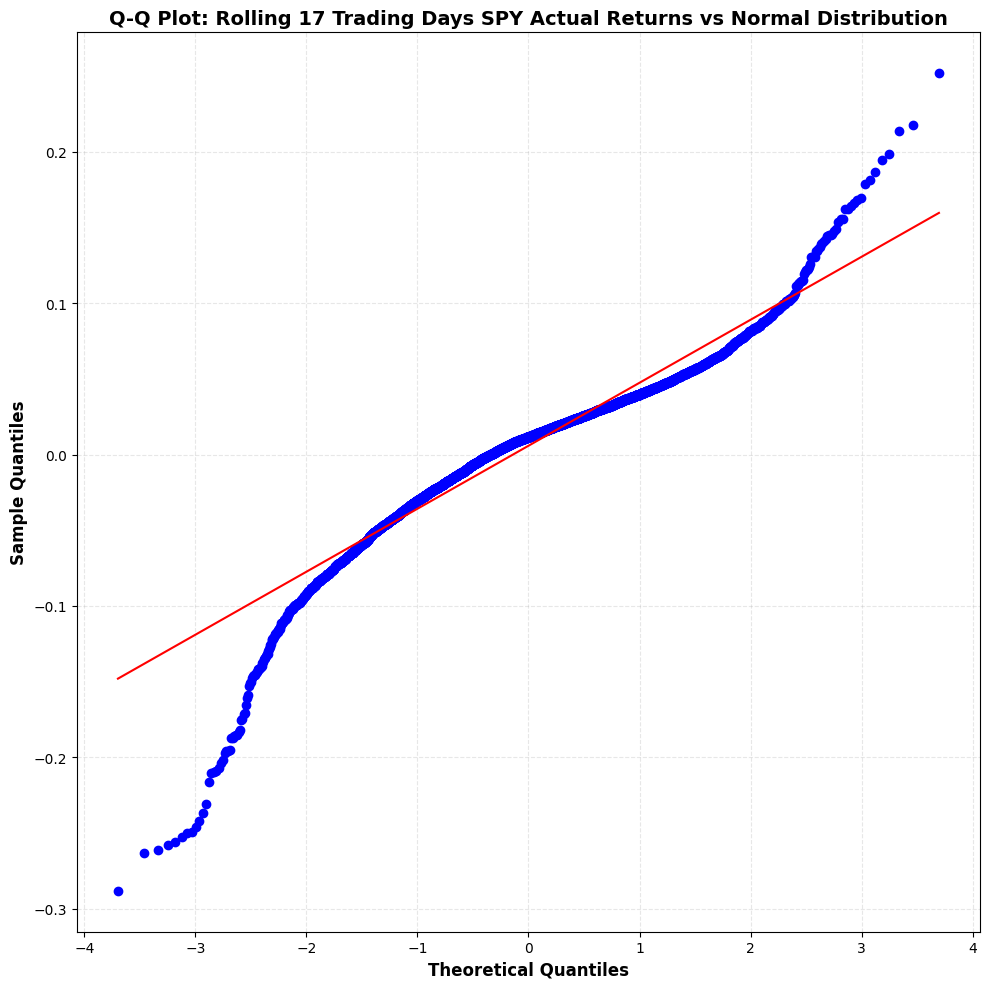

{'mean': np.float64(0.0057873872089739915),
 'std': np.float64(0.04306112704008485),
 'median': np.float64(0.011643192547449166),
 'skewness': np.float64(-0.9280890440667409),
 'kurtosis': np.float64(4.833276879255651),
 'last_return': np.float64(-0.029762130282991683),
 'last_date': Timestamp('2025-04-09 00:00:00')}

In [ ]:
analyze_and_plot_return_distribution(df_spy_filtered, "Rolling_17d_Return", title_prefix="Rolling 17 Trading Days SPY")


In [ ]:
# ============================================================================
# PRINT SUMMARY STATISTICS
# ============================================================================

# Get the speicfic last return statistic (2025-04-09)
rolling_returns = df_spy_filtered['Rolling_17d_Return'] 
last_day_rolling_return = df_spy_filtered['Rolling_17d_Return'].iloc[-1]
last_date = df_spy_filtered.index[-1]

spy_rolling_return_statistic = print_returns_summary_statistics(rolling_returns, last_day_rolling_return, last_date)

spy_rolling_return_statistic 


SPY DAILY RETURNS DISTRIBUTION ANALYSIS (2000-01-01 to 2025-04-09)

BASIC STATISTICS:
   Mean Return:              0.5787%  (145.84% annualized)
   Median Return:            1.1643%
   Standard Deviation:       4.3061%  (68.36% annualized)
   Variance:                 18.542607% squared

DISTRIBUTION SHAPE:
   Skewness:                 -0.9281  (left-tailed)
   Excess Kurtosis:          4.8333  (fat tails)

PERCENTILES:
   1st Percentile:           -12.55%
   5th Percentile:           -6.87%
   25th Percentile (Q1):     -1.52%
   50th Percentile (Median): 1.16%
   75th Percentile (Q3):     3.04%
   95th Percentile:          6.23%
   99th Percentile:          10.11%

EXTREME VALUES:
   Minimum Return:           -28.82%  (2020-03-16)
   Maximum Return:           25.18%  (2020-04-16)
   Range:                    54.00%

NORMALITY TEST (Jarque-Bera):
   Test Statistic:           7067.55
   P-value:                  0.000000
   Result:                   NOT normally distributed (p < 0.05)


{'Total Trading Days': 6339,
 'mean': np.float64(0.0057873872089739915),
 'std': np.float64(0.04306112704008485),
 'median': np.float64(0.011643192547449166),
 'skewness': np.float64(-0.9280890440667409),
 'kurtosis': np.float64(4.833276879255651),
 'min': np.float64(-0.28817346629967133),
 'max': np.float64(0.25184986451477553),
 'jb_stat': np.float64(7067.552492093047),
 'jb_pvalue': np.float64(0.0),
 'return_value': np.float64(-0.029762130282991683),
 'z_score': np.float64(-0.8255593834985612),
 'percentile_rank': np.float64(16.217068938318345),
 'percentile_1': np.float64(-0.1255317742674153),
 'percentile_5': np.float64(-0.06865681820089287),
 'percentile_25': np.float64(-0.015164883412501107),
 'percentile_50': np.float64(0.011643192547449166),
 'percentile_75': np.float64(0.03039012790472051),
 'percentile_95': np.float64(0.062267027391442145),
 'percentile_99': np.float64(0.10114769193653707)}

In [ ]:
df_daily_return_stats = pd.DataFrame([spy_daily_return_statistic])
df_daily_return_stats

,Total Trading Days,mean,std,median,skewness,kurtosis,min,max,jb_stat,jb_pvalue,return_value,z_score,percentile_rank,percentile_1,percentile_5,percentile_25,percentile_50,percentile_75,percentile_95,percentile_99
0,6355,0.000356,0.012302,0.000669,0.052612,12.000972,-0.109424,0.145197,38073.138416,0.0,0.105019,8.50814,99.968529,-0.034287,-0.019204,-0.004695,0.000669,0.005996,0.017305,0.03353


In [ ]:
df_rolling_return_stats = pd.DataFrame([spy_rolling_return_statistic])
df_rolling_return_stats

,Total Trading Days,mean,std,median,skewness,kurtosis,min,max,jb_stat,jb_pvalue,return_value,z_score,percentile_rank,percentile_1,percentile_5,percentile_25,percentile_50,percentile_75,percentile_95,percentile_99
0,6339,0.005787,0.043061,0.011643,-0.928089,4.833277,-0.288173,0.25185,7067.552492,0.0,-0.029762,-0.825559,16.217069,-0.125532,-0.068657,-0.015165,0.011643,0.03039,0.062267,0.101148


In [ ]:
df_daily_return_stats.to_csv('../data/SPY/SPY_daily_return_summary_statistic.csv', index=False)
df_rolling_return_stats.to_csv('../data/SPY/SPY_rolling_17_trading_days_return_summary_statistic.csv',index=False)
df_spy_filtered.to_csv('../data/SPY/SPY_return_processed.csv',index=True)